In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
coef_path = '/home/crazyjeannot/Documents/doctorat/dev/GENRES/coefficients_subgenres.csv'

In [5]:
coefs = pd.read_csv(coef_path)

In [6]:
coefs

,Unnamed: 0,PER_adj_VECTOR_1,PER_adj_VECTOR_2,PER_adj_VECTOR_3,PER_adj_VECTOR_4,PER_adj_VECTOR_5,PER_adj_VECTOR_6,PER_adj_VECTOR_7,PER_adj_VECTOR_8,PER_adj_VECTOR_9,...,ni_le,l’_argent,faire_pour,le_vérité,mais_à,ça_ne,le_feu,avoir_je,j’_aller,le_nature
0,0,0.000523,-0.000098,-0.000794,-0.003609,-0.000611,0.000040,0.000011,-0.002814,0.002989,...,-0.002620,0.000287,0.003009,0.001038,-0.000732,0.000912,-0.000139,-0.000092,-0.007109,-0.003122
1,1,0.001210,0.001862,0.001840,-0.003365,-0.000531,-0.001825,-0.001239,-0.002504,-0.000710,...,0.000187,-0.000474,0.004233,-0.003792,-0.001481,-0.005006,0.001933,-0.000996,-0.002665,-0.000400
2,2,0.003546,0.001593,0.004101,-0.001206,0.003788,-0.004192,-0.001010,0.003004,0.001216,...,0.003126,0.000074,-0.001583,-0.000771,-0.006602,-0.000677,0.000618,-0.001224,-0.000420,-0.004278
3,3,-0.002254,0.000212,-0.000048,-0.002215,-0.000446,-0.004223,-0.001132,-0.001119,-0.004850,...,-0.001261,0.001162,0.001662,-0.004257,0.001707,0.000963,0.002051,-0.003689,-0.002480,0.000949
4,4,-0.001034,0.002036,0.003503,0.001901,-0.002755,-0.002646,-0.001918,0.001479,-0.001068,...,0.003978,0.001200,0.002476,-0.004113,0.001516,-0.006594,0.000750,0.000557,0.000293,0.000411
5,5,0.001596,0.000230,0.002124,0.000199,0.002693,0.000144,-0.002098,0.002932,-0.000595,...,0.007651,0.000179,-0.001958,0.000984,-0.005096,-0.000680,-0.000741,0.001175,0.002872,-0.003272
6,6,-0.001079,0.000830,-0.000460,0.001966,-0.000428,-0.000437,0.000413,0.000814,-0.001839,...,0.002473,0.001301,0.001394,-0.001285,0.001507,0.001941,0.000538,-0.002483,0.000970,0.000688
7,7,0.004422,-0.004312,0.003703,0.002174,0.003940,0.002526,0.000446,-0.000299,0.003850,...,0.002852,0.000590,-0.004302,0.007582,-0.000858,0.001682,-0.000838,-0.001215,0.000598,-0.002086
8,8,0.000342,-0.001611,-0.000941,-0.002079,0.000458,0.000096,-0.000871,0.000690,-0.001462,...,-0.000885,-0.000146,-0.002009,0.003112,0.001471,0.004153,0.000344,-0.002563,-0.000395,0.000597
9,9,-0.002076,0.000258,-0.003152,-0.001035,0.000178,-0.000989,-0.001871,0.001680,-0.003685,...,-0.004226,0.001120,0.000630,-0.002817,0.002935,0.002846,0.001919,-0.002618,0.000086,0.001222


In [9]:
coefs.iloc[:, 3250:3254]

,LOC_VECTOR_300,FAC_VECTOR_1,FAC_VECTOR_2,FAC_VECTOR_3
0,0.001494,0.003558,0.000403,0.000362


In [10]:
coefs.columns = ['subgenre']+['PER_adj' for i in range(300)]+['PER_verb' for i in range(300)]+['BOW_uni' for i in range(1000)]+['BOW_bi' for i in range(1000)]+['TOPIC' for i in range(50)]+['TIME' for i in range(300)]+['LOC' for i in range(300)]+['FAC' for i in range(300)]+['VEH' for i in range(300)]

In [23]:
def calculate_feature_importance(dataframe):
    facet_columns = ['PER_adj', 'PER_verb', 'BOW_uni', 'BOW_bi', 'TOPIC', 'TIME', 'LOC', 'FAC', 'VEH']
    feature_importance = {}

    for facet in facet_columns:
        facet_columns_subset = [column for column in dataframe.columns if facet in column]
        facet_data = dataframe[facet_columns_subset]
        facet_importance = facet_data.abs().iloc[0].sum() / len(facet_columns_subset)
        feature_importance[facet] = facet_importance

    return feature_importance

In [24]:
feature_importance = calculate_feature_importance(coefs)

In [25]:
feature_importance

{'PER_adj': 0.6229150774205281,
 'PER_verb': 0.5414180781804472,
 'BOW_uni': 2.2849782583695863,
 'BOW_bi': 2.2214802063914196,
 'TOPIC': 0.1403595757435743,
 'TIME': 0.5672604914527736,
 'LOC': 0.6054814665291102,
 'FAC': 0.6289881592372777,
 'VEH': 0.6911307132755448}

In [26]:
df_discriminant = pd.DataFrame.from_dict(feature_importance, orient='index', columns=["values"])

In [27]:
df_discriminant["features"]=df_discriminant.index

In [28]:
df_discriminant

,values,features
PER_adj,0.622915,PER_adj
PER_verb,0.541418,PER_verb
BOW_uni,2.284978,BOW_uni
BOW_bi,2.221480,BOW_bi
TOPIC,0.140360,TOPIC
TIME,0.567260,TIME
LOC,0.605481,LOC
FAC,0.628988,FAC
VEH,0.691131,VEH


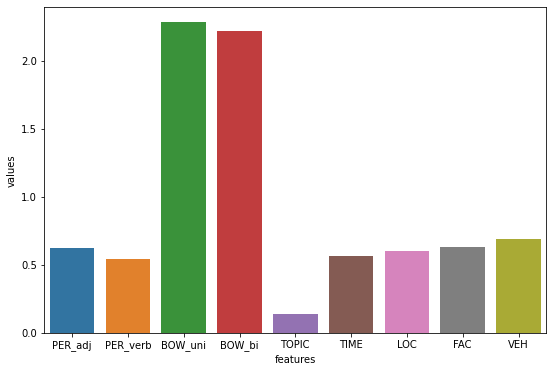

In [29]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax = sns.barplot(data=df_discriminant, x="features", y="values", ax=ax)